<p style="text-align:center;font-size:35px;color:green;"><b>Loading online retail sales dataset</b></p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("online_retail_sales.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536758,91880,blue glass teacup,-7,2023-02-19,22.93,35827.0,United Kingdom
1,C536491,85123A,WHITE HANGING LANTERN,2,2023-02-16,13.03,92696.0,Spain
2,536517,OLD STOCK,POPPY'S PLAYHOUSE 1:50 SCALE IN METAL,-2,2024-06-15,33.83,NaN,Italy
3,C537032,OLD STOCK,POPPY'S PLAYHOUSE 1:50 SCALE IN METAL,15,2024-08-01,11.41,NaN,UK
4,537324,10120,RED WOOLLY HOTTIE WHITE HEART,11,2023-02-26,17.72,NaN,USA


<p style="text-align:center;font-size:35px;color:green;"><b>Cleaning the dataset</b></p>

<p style="text-align:left;color:green;font-size:25px;"><b>Finding null values,duplicates and the datatypes</b></p>

In [3]:
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.dtypes)

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     486
Country          0
dtype: int64
0
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice       object
CustomerID     float64
Country         object
dtype: object


<p style="text-align:left;color:green;font-size:25px;"><b>Treating the null values, inconsistency and assigning correct datatypes</b></p>

In [4]:
import warnings
warnings.filterwarnings('ignore')
data['CustomerID'].fillna(99999,inplace=True)

In [5]:
data['CustomerID']=data['CustomerID'].astype(int)

In [6]:
data['InvoiceDate']=data['InvoiceDate'].astype(str)
data['InvoiceDate']=data['InvoiceDate'].str.replace("/","-")

In [7]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%Y-%m-%d',errors='coerce')

In [8]:
print(data['InvoiceDate'].isna().sum())

2


In [9]:
data[data['InvoiceDate'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142,537179,91880,BLUE GLASS TEACUP,6,NaT,13.13,13015,Spain
253,536903,OLD STOCK,POPPY'S PLAYHOUSE 1:50 SCALE IN METAL,3,NaT,41.92,66826,Italy


In [10]:
data=data[data['InvoiceDate'].notna()]

In [11]:
import re
def detect_pattern(col):
    if pd.isnull(col):
        return "NULL"
    elif re.match(r'^\d+$',col):
        return "All digits"
    elif re.match(r'^[A-Z]+\d+$',col):
        return "Letters+Digits"
    elif re.match(r'^\d+[A-Z]+$',col):
        return "Digits+Letters"
    elif re.match(r'^[A-Z]*\d+[A-Z]*$',col):
        return "Mixed Pattern"
    else:
        return "Irregular/Mixed"
data['Pattern_type']=data['InvoiceNo'].apply(detect_pattern)
data['Pattern_type']

0      Letters+Digits
1      Letters+Digits
2          All digits
3      Letters+Digits
4          All digits
            ...      
995        All digits
996    Letters+Digits
997    Letters+Digits
998    Letters+Digits
999    Letters+Digits
Name: Pattern_type, Length: 998, dtype: object

In [12]:
data['Pattern_type'].value_counts()

Pattern_type
Letters+Digits    512
All digits        486
Name: count, dtype: int64

In [13]:
data.to_excel("Data online.xlsx")

In [14]:
def add_c(col):
    if re.match(r'^\d+$',col):
        return 'C'+str(col)
    else:
        return col
data['InvoiceNo']=data['InvoiceNo'].apply(add_c)

In [15]:
data['Pattern_type'].value_counts()

Pattern_type
Letters+Digits    512
All digits        486
Name: count, dtype: int64

In [16]:
def detect_patterns(col):
    col=str(col).strip()
    if pd.isnull(col):
        return "NULL"
    elif re.match(r'^\d+$',col):
        return "All digits"
    elif re.match(r'^[A-Z]+$',col):
        return "All Letters"
    elif re.match(r'^[A-Z]+\d+$',col):
        return "Letters+Digits"
    elif re.match(r'^\d+[A-Z]+$',col):
        return "Digits+Letters"
    elif re.match(r'^[A-Z]*\d+[A-Z]*$',col):
        return "Mixed Pattern"
    else:
        return "Irregular/Mixed"
data['Stock_pattern']=data['StockCode'].apply(detect_patterns)

In [17]:
data['Stock_pattern'].value_counts()

Stock_pattern
All digits         672
Digits+Letters     171
Irregular/Mixed    155
Name: count, dtype: int64

In [18]:
data.to_excel("Data online2.xlsx")

In [19]:
data=data[data['Stock_pattern']!='Irregular/Mixed']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Pattern_type,Stock_pattern
0,C536758,91880,blue glass teacup,-7,2023-02-19,22.93,35827,United Kingdom,Letters+Digits,All digits
1,C536491,85123A,WHITE HANGING LANTERN,2,2023-02-16,13.03,92696,Spain,Letters+Digits,Digits+Letters
4,C537324,10120,RED WOOLLY HOTTIE WHITE HEART,11,2023-02-26,17.72,99999,USA,All digits,All digits
5,C536478,71053,CREAM CUPID HEARTS COAT HANGER,12,2023-02-22,15.13,50539,Germany,Letters+Digits,All digits
6,C537287,91880,BLUE GLASS TEACUP,-5,2023-11-29,29.7,99999,UK,All digits,All digits
...,...,...,...,...,...,...,...,...,...,...
993,C536689,10120,RED WOOLLY HOTTIE WHITE HEART,16,2024-08-02,45.77,99999,Italy,All digits,All digits
994,C536894,91880,BLUE GLASS TEACUP,15,2023-08-10,31.34,63098,France,Letters+Digits,All digits
996,C536597,20413,SMALL CHAIRS SET OF 4,-3,2024-12-23,26.39,99999,UK,Letters+Digits,All digits
997,C536543,20413,SMALL CHAIRS SET OF 4,-2,2024-11-14,14.45,99999,United Kingdom,Letters+Digits,All digits


In [20]:
data['Quantity']=data['Quantity'].astype(str).str.replace("-","")
data['Quantity']=data['Quantity'].astype(int)

In [21]:
data['UnitPrice']=data['UnitPrice'].astype(str).str.replace(",",".")

In [22]:
data['UnitPrice']=data['UnitPrice'].astype(float)
data=data.drop(columns=['Pattern_type','Stock_pattern'])

In [32]:
data['StockCode']=data['StockCode'].str.strip()
data['StockCode'].unique()

array(['91880', '85123A', '10120', '71053', '20413'], dtype=object)

<p style="text-align:center;font-size:35px;color:green;"><b>Exploratory Data Analysis</b></p>

<p style="text-align:left;color:green;font-size:25px;"><b>Summary statistics of numerical columns</b></p>

In [37]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,843.000000,843,843.00000,843.000000
mean,7.446026,2024-01-02 17:06:37.153025024,25.36688,76463.918149
min,0.000000,2023-01-01 00:00:00,1.02000,10018.000000
25%,3.000000,2023-07-18 00:00:00,12.60500,53757.000000
50%,6.000000,2024-01-16 00:00:00,25.89000,97723.000000
75%,10.000000,2024-06-30 00:00:00,37.27000,99999.000000
max,20.000000,2024-12-30 00:00:00,49.98000,99999.000000
std,5.516580,NaN,14.18533,29179.365880


<p style="text-align:left;color:green;font-size:25px;"><b>Structural summary of the dataset</b></p>

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    843 non-null    object        
 1   StockCode    843 non-null    object        
 2   Description  843 non-null    object        
 3   Quantity     843 non-null    int64         
 4   InvoiceDate  843 non-null    datetime64[ns]
 5   UnitPrice    843 non-null    float64       
 6   CustomerID   843 non-null    int64         
 7   Country      843 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 59.3+ KB


<p style="text-align:left;color:green;font-size:25px;"><b>Detecting Outliers</b></p>

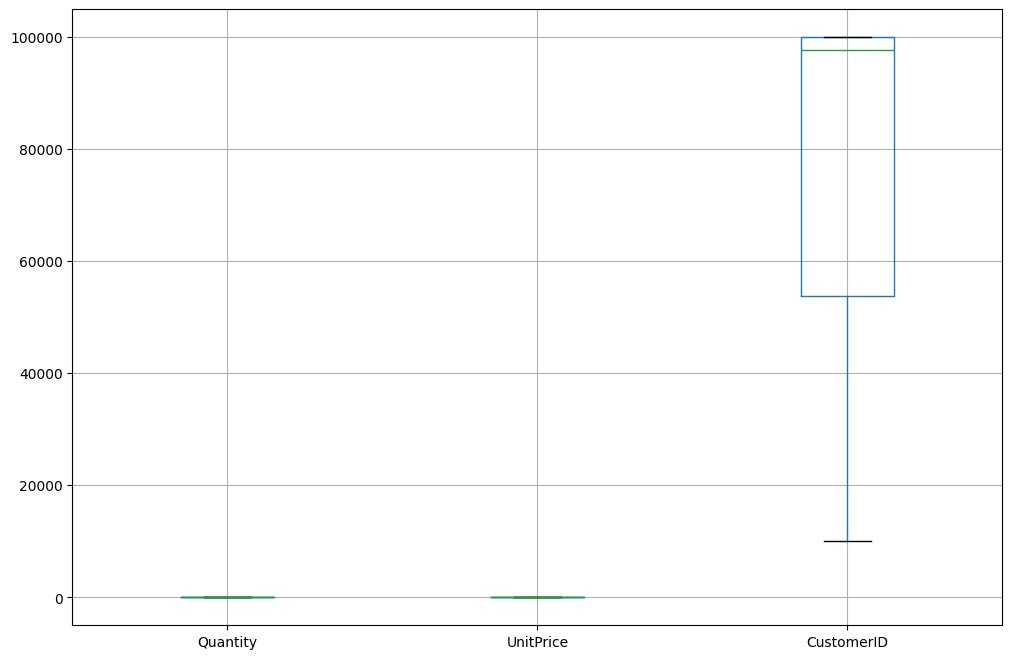

In [34]:
import matplotlib.pyplot as plt
data.boxplot(figsize=(12,8))
plt.show()

<p style="text-align:left;color:green;font-size:25px;"><b>Pairwise feature relationship</b></p>

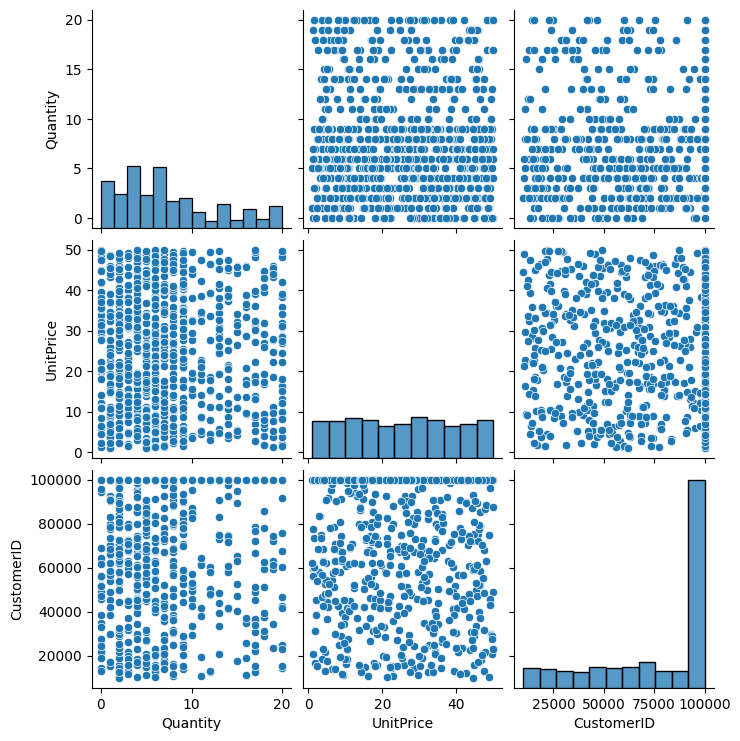

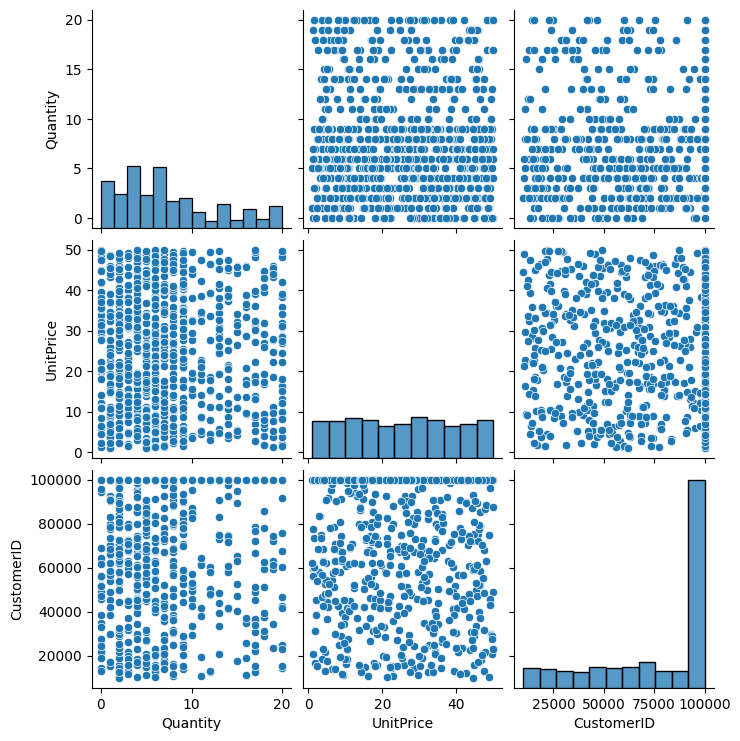

In [36]:
import seaborn as sns
sns.pairplot(data)
plt.show()

<p style="text-align:left;color:green;font-size:25px;"><b>Univariate Analysis</b></p>

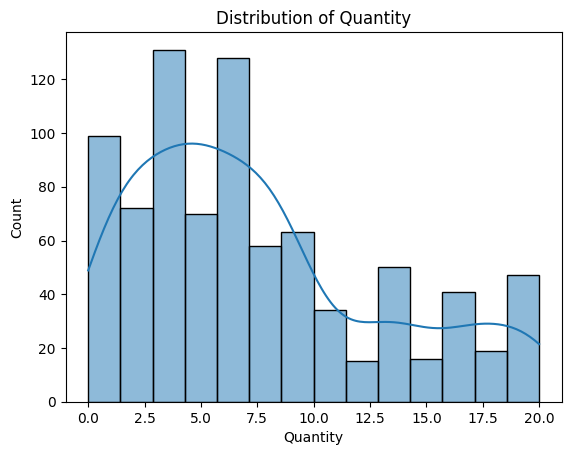

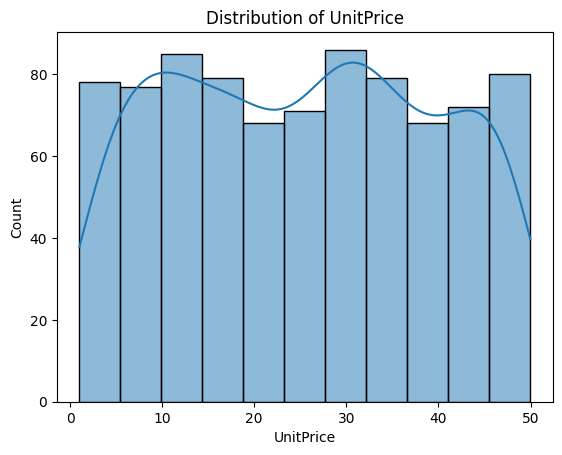

In [39]:
for col in ['Quantity','UnitPrice']:
    sns.histplot(data[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<p style="text-align:left;color:green;font-size:25px;"><b>Value counts of Country column</b></p>

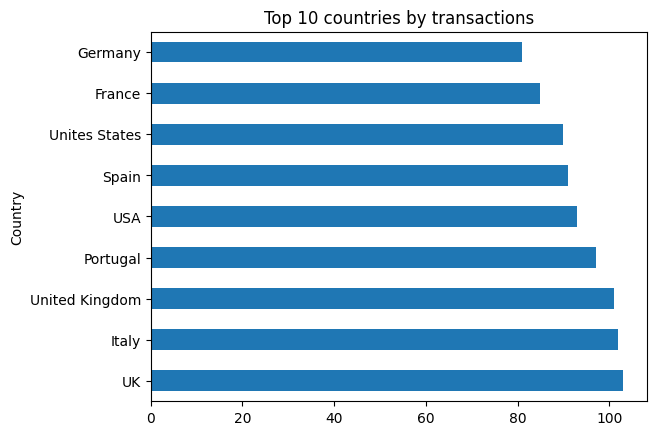

In [40]:
data['Country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 countries by transactions')
plt.show()

<p style="text-align:left;color:green;font-size:25px;"><b>Time based analysis</b></p>

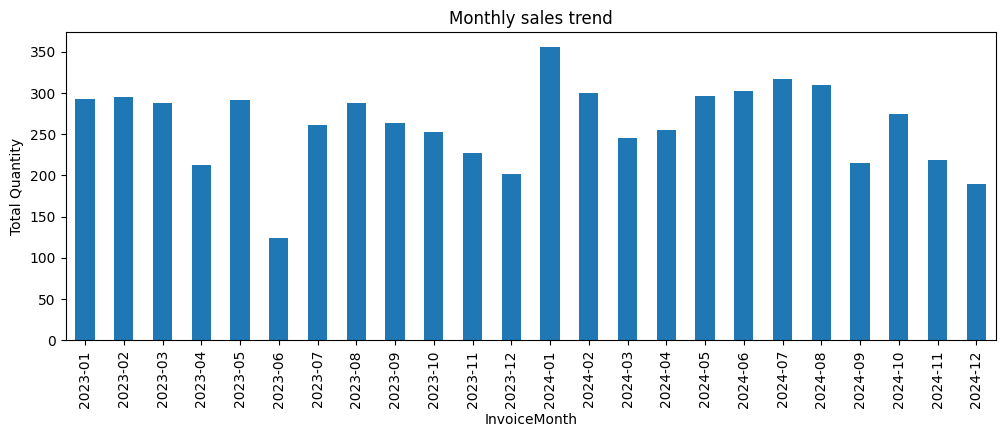

In [42]:
data['InvoiceMonth']=data['InvoiceDate'].dt.to_period('M')
monthly_sales=data.groupby('InvoiceMonth')['Quantity'].sum()
monthly_sales.plot(kind='bar',figsize=(12,4))
plt.title('Monthly sales trend')
plt.ylabel('Total Quantity')
plt.show()

<p style="text-align:center;font-size:35px;color:green;"><b>Final Dataset</b></p>

In [44]:
data=data.drop(columns='InvoiceMonth')

In [46]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536758,91880,blue glass teacup,7,2023-02-19,22.93,35827,United Kingdom
1,C536491,85123A,WHITE HANGING LANTERN,2,2023-02-16,13.03,92696,Spain
4,C537324,10120,RED WOOLLY HOTTIE WHITE HEART,11,2023-02-26,17.72,99999,USA
5,C536478,71053,CREAM CUPID HEARTS COAT HANGER,12,2023-02-22,15.13,50539,Germany
6,C537287,91880,BLUE GLASS TEACUP,5,2023-11-29,29.70,99999,UK


In [49]:
data.to_csv("Final Online sales dataset.csv",index=False)

<p style="text-align:center;font-size:35px;color:green;"><b>Conclusion</b></p>

<div style="color:green;font-size:15px;"><b>
This project involved cleaning and exploring an online retail sales dataset to prepare it for business analysis and modeling.<br>


*Handled missing values and invalid dates.<br>

*Converted data types and standardized invoice/stock formats using regex.<br>

*Removed irregular entries and exported the cleaned dataset.<br>





*Univariate analysis using summary statistics (describe()),histogram.<br>

*Time-based analysis by visualizing monthly sales trends.<br>

*Multivariate analysis via Seaborn pairplot to observe relationships and spot outliers.<br>

*Set a strong foundation for customer segmentation, trend analysis, and forecasting.<br>



Outcome:<br>

The project produced a clean, structured dataset with initial EDA that uncovered key trends and data patterns. It's now ready for deeper analytics and business insights.</b></div>
